In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar los csv como dataframe
df_sex_crime = pd.read_csv("./Reporte_Delitos_sexuales.csv")

In [9]:
# Análsis de csv de delitos sexuales

#Verificar las dimensiones del dataframe
print(df_sex_crime.shape)

# Verificar los tipos de datos de las columnas
print(df_sex_crime.dtypes)

#Eliminar registros duplicados
df_sex_crime.drop_duplicates()

#Verificar cuantos valores nulos hay en el dataset
check_null = df_sex_crime.isnull().sum().sum()
print ("Campos vacios en el dataframe: "+str(check_null))

(252334, 9)
DEPARTAMENTO     object
MUNICIPIO        object
CODIGO DANE     float64
ARMAS MEDIOS     object
FECHA HECHO      object
GENERO           object
GRUPO ETARIO     object
CANTIDAD          int64
delito           object
dtype: object
Campos vacios en el dataframe: 0


In [10]:
#Imprimir los 10 primeros registros
print(df_sex_crime.head(10))

   DEPARTAMENTO           MUNICIPIO  CODIGO DANE                 ARMAS MEDIOS  \
0       CAQUETÁ              SOLANO   18756000.0  ARMA BLANCA / CORTOPUNZANTE   
1       BOLÍVAR      CARTAGENA (CT)   13001000.0  ARMA BLANCA / CORTOPUNZANTE   
2         HUILA            LA PLATA   41396000.0  ARMA BLANCA / CORTOPUNZANTE   
3     SANTANDER         PIEDECUESTA   68547000.0                 CONTUNDENTES   
4          META  VILLAVICENCIO (CT)   50001000.0                 CONTUNDENTES   
5       BOLÍVAR      CARTAGENA (CT)   13001000.0                 CONTUNDENTES   
6  CUNDINAMARCA    BOGOTÁ D.C. (CT)   11001000.0                 CONTUNDENTES   
7        BOYACÁ                PAYA   15533000.0                 CONTUNDENTES   
8  CUNDINAMARCA    BOGOTÁ D.C. (CT)   11001000.0                 CONTUNDENTES   
9  CUNDINAMARCA    BOGOTÁ D.C. (CT)   11001000.0                 CONTUNDENTES   

  FECHA HECHO     GENERO GRUPO ETARIO  CANTIDAD  \
0   1/01/2010   FEMENINO      MENORES         1   
1   1/

In [11]:
#Eliminar la columna "Codigo dane" pues no me está aportando información sobre los datos
df_sex_crime.drop('CODIGO DANE', axis=1, inplace=True)
print(df_sex_crime.head(10))

   DEPARTAMENTO           MUNICIPIO                 ARMAS MEDIOS FECHA HECHO  \
0       CAQUETÁ              SOLANO  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
1       BOLÍVAR      CARTAGENA (CT)  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
2         HUILA            LA PLATA  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
3     SANTANDER         PIEDECUESTA                 CONTUNDENTES   1/01/2010   
4          META  VILLAVICENCIO (CT)                 CONTUNDENTES   1/01/2010   
5       BOLÍVAR      CARTAGENA (CT)                 CONTUNDENTES   1/01/2010   
6  CUNDINAMARCA    BOGOTÁ D.C. (CT)                 CONTUNDENTES   1/01/2010   
7        BOYACÁ                PAYA                 CONTUNDENTES   1/01/2010   
8  CUNDINAMARCA    BOGOTÁ D.C. (CT)                 CONTUNDENTES   1/01/2010   
9  CUNDINAMARCA    BOGOTÁ D.C. (CT)                 CONTUNDENTES   1/01/2010   

      GENERO GRUPO ETARIO  CANTIDAD  \
0   FEMENINO      MENORES         1   
1   FEMENINO  ADOLECENTES         1   
2 

In [12]:
# Convertir el tipo de dato de la columna "Fecha hecho" a datetime
df_sex_crime['FECHA HECHO'] = pd.to_datetime(df_sex_crime['FECHA HECHO'],  format="%d/%m/%Y")
df_sex_crime.dtypes

DEPARTAMENTO            object
MUNICIPIO               object
ARMAS MEDIOS            object
FECHA HECHO     datetime64[ns]
GENERO                  object
GRUPO ETARIO            object
CANTIDAD                 int64
delito                  object
dtype: object

                    DEPARTAMENTO
CUNDINAMARCA               46416
ANTIOQUIA                  29366
VALLE                      26323
SANTANDER                  17284
ATLÁNTICO                  11623
HUILA                      10389
TOLIMA                      9075
BOLÍVAR                     8588
BOYACÁ                      8035
META                        7926
RISARALDA                   7523
NARIÑO                      6830
CÓRDOBA                     6713
CAUCA                       6612
NORTE DE SANTANDER          6125
CALDAS                      6041
MAGDALENA                   5860
CESAR                       4936
SUCRE                       4687
CAQUETÁ                     3614
QUINDÍO                     3509
GUAJIRA                     2866
CASANARE                    2451
PUTUMAYO                    2284
CHOCÓ                       2079
ARAUCA                      2000
AMAZONAS                     976
GUAVIARE                     895
SAN ANDRÉS                   479
VICHADA   

<AxesSubplot:>

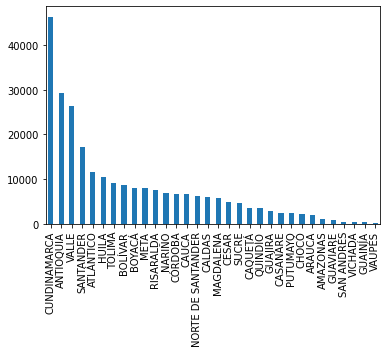

In [19]:
# Análisis cualitativo de la columna Departamento

# Frecuencia absoluta de cada departamento
department_frecuency = df_sex_crime["DEPARTAMENTO"].value_counts().to_frame()
print(department_frecuency)
print("Departamento con mayor frecuencia de delitos sexuales: " +str(department_frecuency.idxmax(axis = 0)))
print("Departamento con menor frecuencia de delitos sexuales: " +str(department_frecuency.idxmin(axis = 0)))

#Imprimir gráfico de barras
df_sex_crime["DEPARTAMENTO"].value_counts().plot(kind = "bar")

media: 2017-06-20
fecha más reciente: 2010-01-01
fecha más antigua: 2021-12-31


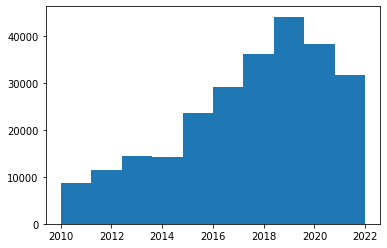

Desviación estandar :1086 days 14:55:15.776626064


In [61]:
# Análisis cuantitativo de la columna Fecha del hecho
date_col = df_sex_crime["FECHA HECHO"]
mean = np.mean(date_col)
print("media: " + str(mean.date()))
minimum = np.min(date_col)
print("fecha más reciente: " + str(minimum.date()))
maximum = np.max(date_col)
print("fecha más antigua: " + str(maximum.date()))

#Histograma por fecha de hecho
plt.hist(date_col)
plt.show()

std_deviation = np.std(date_col)
print("Desviación estandar :" +str(std_deviation))

            GENERO
FEMENINO    215853
MASCULINO    35502
NO REPORTA     673
-                2


array([<AxesSubplot:ylabel='GENERO'>], dtype=object)

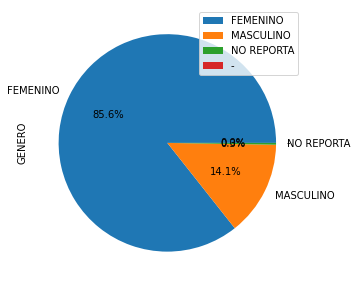

In [78]:
# Análisis cualitativo de la columna Género

# Frecuencia absoluta de cada genero
gender_frecuency = df_sex_crime["GENERO"].value_counts().to_frame()
print(gender_frecuency)

#Gráfica circular
gender_frecuency.plot.pie(subplots=True, figsize=(5, 5), autopct='%1.1f%%')

              GRUPO ETARIO
MENORES             127399
ADULTOS              77508
ADOLECENTES          38779
ADOLESCENTES          8069
NO REPORTA              42


<AxesSubplot:>

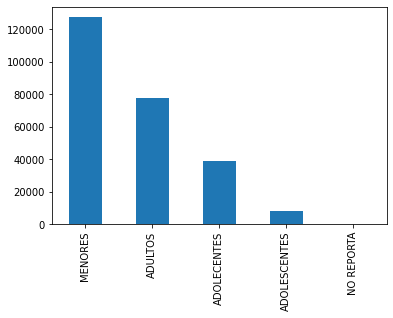

In [83]:
# Análisis cualitativo de grupo etario

# Frecuencia absoluta de cada grupo dentro de la población

group_frecuency = df_sex_crime["GRUPO ETARIO"].value_counts().to_frame()
print(group_frecuency)

#Imprimir gráfico de barras
df_sex_crime["GRUPO ETARIO"].value_counts().plot(kind = "bar")

#Al imprimir el gráfico de barras se evidencia que hay errores de escritura en los datos, 
#existen dos grupos "adolecentes" y "adolescentes"

                             ARMAS MEDIOS
SIN EMPLEO DE ARMAS                118272
NO REPORTADO                        68119
CONTUNDENTES                        44105
ARMA BLANCA / CORTOPUNZANTE         12343
ESCOPOLAMINA                         6035
ARMA DE FUEGO                        2205
LICOR ADULTERADO                      967
CORTOPUNZANTES                        107
CINTAS/CINTURON                       102
ESPOSAS                                62
CORTANTES                              14
-                                       2
ARMAS BLANCAS                           1


<AxesSubplot:>

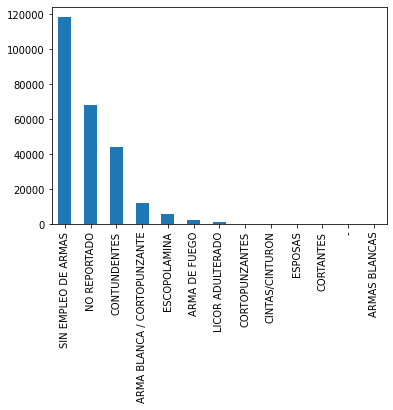

In [87]:
# Análisis cualitativo de la columna Armas medios

# Frecuencia absoluta de cada genero
weapon_frecuency = df_sex_crime["ARMAS MEDIOS"].value_counts().to_frame()
print(weapon_frecuency)

#Imprimir gráfico de barras
df_sex_crime["ARMAS MEDIOS"].value_counts().plot(kind = "bar")

In [96]:
#¿Cuáles han sido los departamentos (TOP 3) más afectados a nivel histórico y en el último año?

#Top 3 a nivel histórico
department_frecuency = df_sex_crime["DEPARTAMENTO"].value_counts().to_frame()
print(department_frecuency.head(3))

#Los depertamentos en los que más se han presentado delitos sexuales son Cundinamarca, Antioquia y Valle

              DEPARTAMENTO
CUNDINAMARCA         46416
ANTIOQUIA            29366
VALLE                26323


In [98]:
#Para los casos en los que se disponga del detalle del delito o de una descripción, 
#como por ejemplo en delitos sexuales y secuestro, ¿cuáles son los delitos, descripciones o modalidades más comunes?

#Modalidades más usadas
print(weapon_frecuency.head(5))

#Las modalidades más usadas son sin empleo de armas, contundentes o de arma blanca

                             ARMAS MEDIOS
SIN EMPLEO DE ARMAS                118272
NO REPORTADO                        68119
CONTUNDENTES                        44105
ARMA BLANCA / CORTOPUNZANTE         12343
ESCOPOLAMINA                         6035


array([<AxesSubplot:ylabel='GRUPO ETARIO'>], dtype=object)

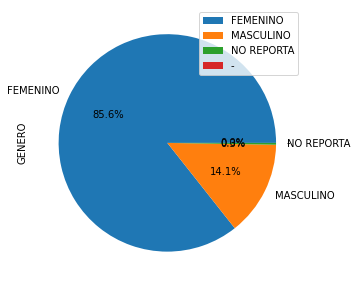

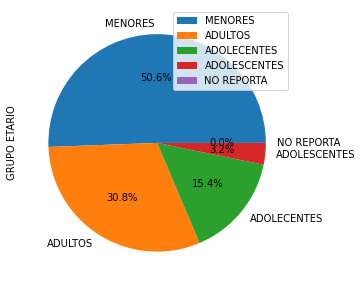

In [99]:
#¿Cómo es la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? 
#¿Han variado con el paso de los años?

gender_frecuency.plot.pie(subplots=True, figsize=(5, 5), autopct='%1.1f%%')
group_frecuency.plot.pie(subplots=True, figsize=(5, 5), autopct='%1.1f%%')